In [78]:
%matplotlib inline
import random
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np
import scipy
from scipy import stats
import seaborn

In [79]:
data = pd.read_csv('pronto_Cycle_Share_Trip_Data.csv')
print(len(data))
data.head()

275091


,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,10/13/2014 10:31:00 AM,10/13/2014 10:48:00 AM,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0
1,432,10/13/2014 10:32:00 AM,10/13/2014 10:48:00 AM,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0
2,433,10/13/2014 10:33:00 AM,10/13/2014 10:48:00 AM,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0
3,434,10/13/2014 10:34:00 AM,10/13/2014 10:48:00 AM,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0
4,435,10/13/2014 10:34:00 AM,10/13/2014 10:49:00 AM,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0


In [80]:
for i in data.columns: 
    print(i, '\t', data[i].dtype)

trip_id 	 int64
starttime 	 object
stoptime 	 object
bikeid 	 object
tripduration 	 float64
from_station_name 	 object
to_station_name 	 object
from_station_id 	 object
to_station_id 	 object
usertype 	 object
gender 	 object
birthyear 	 float64


In [81]:
#Univariate Analysis

In [82]:
#Determining the Time Range of the Dataset
data = data.sort_values(by='starttime')
data.reset_index()
print('Date range of dataset: %s - %s' %(data.ix[1, 'starttime'],
                                        data.ix[len(data) -1, 'stoptime']))

Date range of dataset: 10/13/2014 10:32:00 AM - 04/01/2017 02:33:00 AM


In [83]:
#the analys of range presente 2 insights. one is that the data ranges form october 2014 up till april 2017
#it seems like the cycle sharing service is usually operational beyond the standard 9 to 5 business hours.

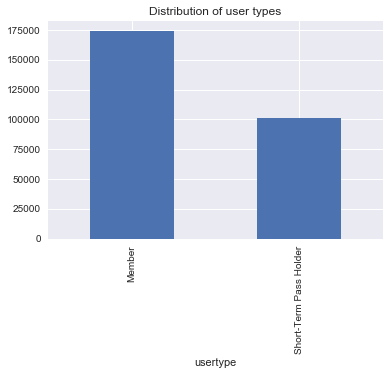

In [84]:
#Plotting the Distribution of User Types
groupby_user = data.groupby('usertype').size()
groupby_user.plot.bar(title='Distribution of user types')


In [85]:
#members tend to avail more trips than their counterparts.

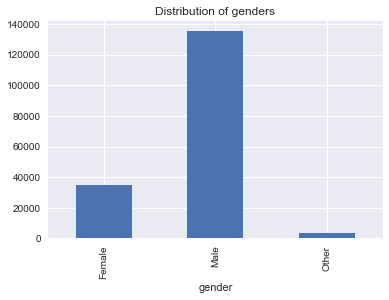

In [86]:
#Plotting the Distribution of Gender
groupby_gender = data.groupby('gender').size()
groupby_gender.plot.bar(title='Distribution of genders')

In [87]:
#Males seem to dominte the trips taken as part of the program.

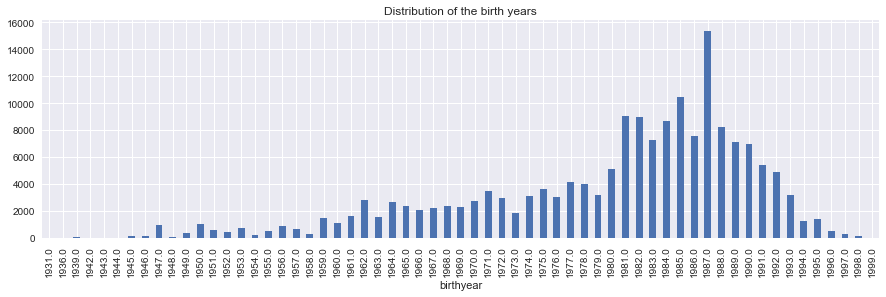

In [88]:
#Plotting the Distribution of Birth Years
data = data.sort_values(by='birthyear')
groupby_birthyear = data.groupby('birthyear').size()
groupby_birthyear.plot.bar(title='Distribution of the birth years', figsize=(15, 4))

In [89]:
#Majority of the people who had subscribed to this program belong to Generation Y (i.e., born in the early 1980s to mid
#to late 1990s, also known as millennials).
#the reports published by Elite Daily and CrowdTwist which said that millennials are the most loyal generation to their favorite brands.

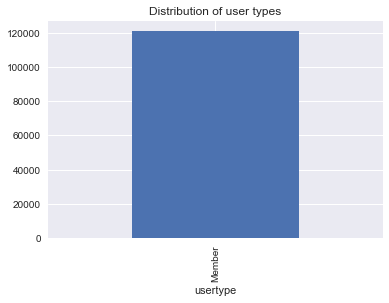

In [90]:
#Plotting the Frequency of Member Types for Millenials
data_mil = data[(data['birthyear'] >= 1977) & (data['birthyear'] <=1994)]
groupby_mil = data_mil.groupby('usertype').size()
groupby_mil.plot.bar(title='Distribution of user types')

In [91]:
#most millennials are members rather than short-term pass holders.

In [92]:
#more insights can pop up when more than one feature is used as part of the analysis.
#Multivariate Analysis

In [93]:
#Plotting the Distribution of Birth Years by Gender Type
groupby_birthyear_gender = data.groupby(['birthyear', 'gender'])['birthyear'].count().unstack('gender').fillna(0)
groupby_birthyear_gender.head(5)

gender,Female,Male,Other
birthyear,,,
1931.0,1.0,0.0,0.0
1936.0,0.0,7.0,0.0
1939.0,0.0,47.0,0.0
1942.0,0.0,2.0,0.0
1943.0,0.0,11.0,0.0


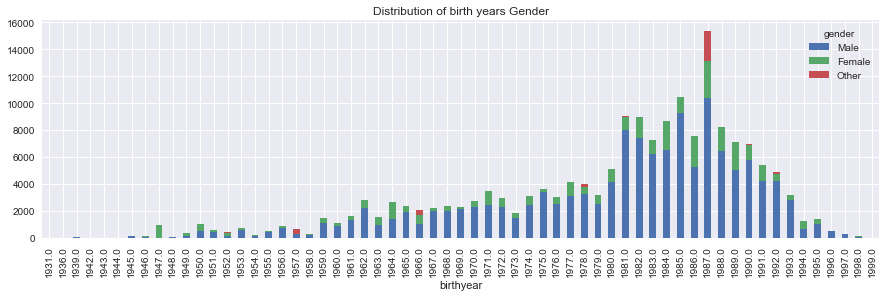

In [94]:
groupby_birthyear_gender[['Male', 'Female', 'Other']].plot.bar(
    title='Distribution of birth years Gender', stacked=True, figsize=(15,4))

In [95]:
#It's seen earlier, that majority of the trips were availed by males, hence this skewed the distribution in favor of males. 
#However, subscribers born in 1947 were all females.
#Moreover, those born in 1964 and 1994 were dominated by females as well.

In [96]:
#Plotting the Distribution of Birth Years by User Types
groupby_birthyear_user = data.groupby(['birthyear', 'usertype']
                                     )['birthyear'].count().unstack('usertype').fillna(0)
groupby_birthyear_user.head(5)

usertype,Member
birthyear,
1931.0,1.0
1936.0,7.0
1939.0,47.0
1942.0,2.0
1943.0,11.0


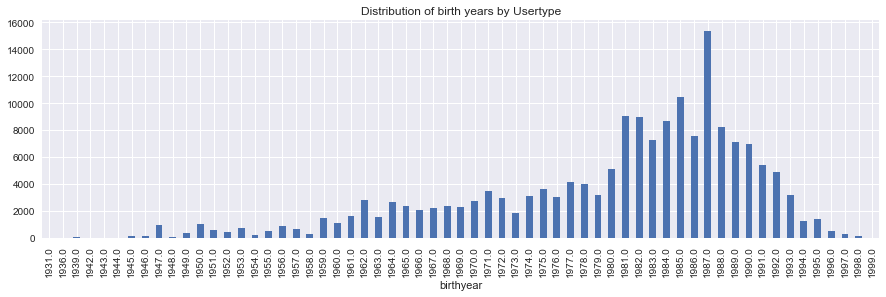

In [97]:
groupby_birthyear_user['Member'].plot.bar(title = 'Distribution of birth years by Usertype', stacked=True, figsize = (15,4))

In [98]:
#It's seems that the distribution was only one user type and not two(membership and short-term pass holders)
# Does this mean that birth year information was only present for only one user type?

In [99]:
#Validation If We Don’t Have Birth Year Available for Short-Term Pass Holders
data[data['usertype']=='Short-Term Pass Holder']['birthyear'].isnull().values.all()

True

In [100]:
#This confirm that birth year data is only available for members.

In [101]:
#Validation If We Don’t Have Gender Available for Short-Term Pass Holders
data[data['usertype']=='Short-Term Pass Holder']['gender'].isnull().values.all()

True

In [102]:
# with this 2 above we can concluded that we don’t have the demographic variables for user type ‘Short-Term Pass holders’.

In [103]:
#Converting String to datetime, and Deriving New Features
import time
List_ = list(data['starttime'])

In [104]:
List_ = [datetime.datetime.strptime(x, "%m/%d/%Y %H:%M:%S %p") for x in List_]

In [105]:
data['starttime_mod'] = pd.Series(List_,index=data.index)
data['starttime_date'] = pd.Series([x.date() for x in List_],index=data.index)
data['starttime_year'] = pd.Series([x.year for x in List_],index=data.index)
data['starttime_month'] = pd.Series([x.month for x in List_],index=data.index)
data['starttime_day'] = pd.Series([x.day for x in List_],index=data.index)
data['starttime_hour'] = pd.Series([x.hour for x in List_],index=data.index)

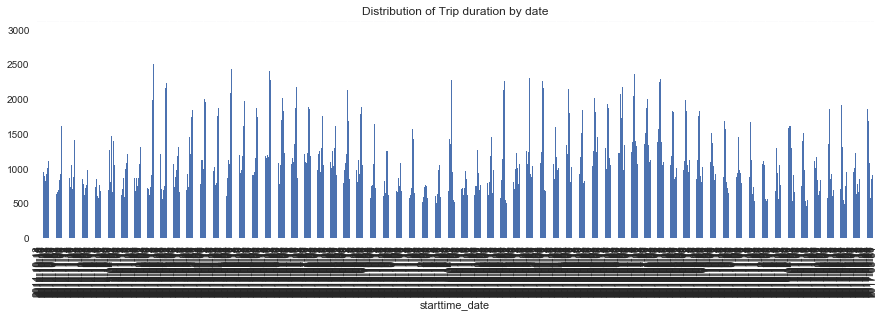

In [106]:
#Plotting the Distribution of Trip Duration over Daily Time
data.groupby('starttime_date')['tripduration'].mean().plot.bar(
    title ='Distribution of Trip duration by date', figsize = (15,4))

In [107]:
#Determining the Measures of Center

In [108]:
trip_duration = list(data['tripduration'])
station_from = list(data['from_station_name'])
print('Mean of trip duration: %f' %statistics.mean(trip_duration))
print('Median  of trip duration : %f' %statistics.median(trip_duration))
print('Mode of station originating from: %s' %statistics.mode(station_from))

Mean of trip duration: 1175.936106
Median  of trip duration : 621.511000
Mode of station originating from: Pier 69 / Alaskan Way & Clay St


In [109]:
data['tripduration'].mean()

1175.936106150336

In [110]:
data['tripduration'].median()

621.511

In [111]:
data['from_station_name'].mode()

0    Pier 69 / Alaskan Way & Clay St
dtype: object

In [112]:
#This revealed that most trips originated from Pier 69/Alaskan Way & Clay St station. 
#Hence this was the ideal location for running promotional campaigns targeted to existing customers. 
#Moreover, the output showed the mean to be greater than the median.

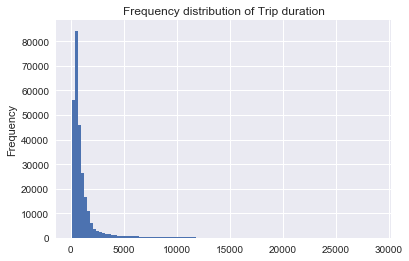

In [113]:
#Plotting Histogram of Trip Duration
data['tripduration'].plot.hist(bins=100, title='Frequency distribution of Trip duration')

In [114]:
#The distribution has only one peak (mode). The distribution is not symmetric and has majority of values toward the right-hand side of the mode. 
#These extreme values toward the right are negligible in quantity, but their extreme nature tends
#to pull the mean toward themselves. Thus the reason why the mean is greater than the median.

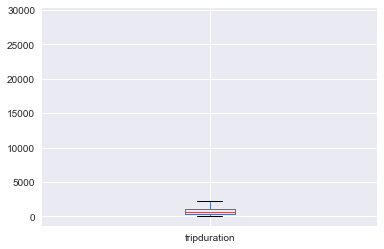

In [115]:
#Plotting a Box plot of Trip Duration
box = data.boxplot(column=['tripduration'])
plt.show()

In [116]:
#Determining Ratio of Values in Observations of tripduration Which Are Outliers
q75, q25 = np.percentile(trip_duration, [75, 25])
iqr = q75 - q25
print('Proportion of values as outlier: %f percent' %(
    (len(data) - len([x for x in trip_duration if q75+(1.5*iqr)>=x>=q25-(1.5*iqr)]))
                    *100/float(len(data))))

Proportion of values as outlier: 9.516124 percent


In [117]:
#Calculating z scores for Observations Lying Within tripduration
mean_trip_duration = np.mean([x for x in trip_duration if q75+(1.5*iqr) >=x>= q25-(1.5*iqr)])
upper_whisker = q75+(1.5*iqr)
print('Mean of trip duration: %f' %mean_trip_duration)

Mean of trip duration: 699.538512


In [118]:
#The mean of non-outlier trip duration values is considerably lower than that calculated in the presence of outliers

In [119]:
#We are now interesting to see the outcome statistics once the outliers were transformed into valid value sets.
#we start with a simple outler transformation to the mean of valid value.

In [120]:
#Calculating Mean Scores for Observations Lying Within tripduration
def transform_tripduration(x):
    if x > upper_whisker:
        return mean_trip_duration
    return x

In [121]:
data['tripduration_mean'] = data['tripduration'].apply(lambda x: transform_tripduration(x))

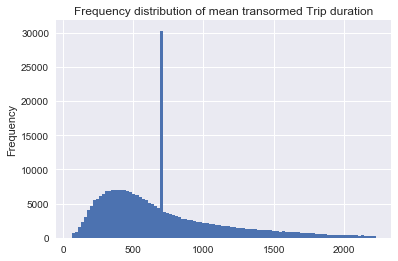

In [122]:
data['tripduration_mean'].plot.hist(bins=100, title='Frequency distribution of mean transormed Trip duration')

In [123]:
#Deternining the Measures of Center in Absence of Outliers
print('Mean of trip duration: %f' %data['tripduration_mean'].mean())
print('Standard deviation of trip duration: %f' %data['tripduration_mean'].std())
print('Median of trip duration: %f' %data['tripduration_mean'].median())

Mean of trip duration: 699.538512
Standard deviation of trip duration: 428.845220
Median of trip duration: 621.511000


In [124]:
#CONTINUE with
#1. Find the mean, median, and mode of the trip duration of gender type male.
#2. By looking at the numbers obtained earlier, in your opinion is the distribution symmetric or skewed? If skewed, then is is it
# positively skewed or negatively skewed?
#3. Plot a frequency distribution of trip duration for trips availed by gender type male. Does it validate your inference as you did so
#in the previous question?
#4. Plot a box plot of the trip duration of trips taken by males. Do you think any outliers exist?
#5. Apply the formula in Listing 1-6 to determine the percentage of observations for which outliers exists.
#6. Perform the treatment of outliers by incorporating one of the methods we discussed earlier for the treatment of outliers.

In [125]:
#CORRELATION

In [129]:
#Pairplot of trip duration and age
data = data.dropna()
data['age'] = data['starttime_year'] - data['birthyear']

/home/winner/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


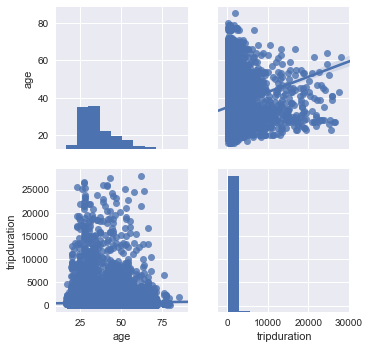

In [130]:
seaborn.pairplot(data, vars=['age', 'tripduration'], kind='reg')

In [127]:
#Correlation Coefficient Between trip duration and age
pd.set_option('display.width', 100)
pd.set_option('precision', 3)

In [152]:
correlations = data[['tripduration', 'age']].corr(method='pearson')
print(correlations)

              tripduration    age
tripduration         1.000  0.056
age                  0.056  1.000


In [153]:
#The correlation coefficient is positive correlation, but being much less than 1. He is weak in nature

In [154]:
#Let’s calculate the two-tail t-test for all categories of genders and user types.
#We do this so we can understand if different categories have resemblance in variances.
#If they do, then they will be considered a group; otherwise they will be treated separately in the analysis mode.

In [159]:
#Computing Two-Tail t-test of Categories of gender and user types
for cat in ['gender','usertype']:
    print('Category: %s\n' %cat)
    groupby_category = data.groupby(['starttime_date', cat])['starttime_date'].count().unstack(cat)
    groupby_category = groupby_category.dropna()
    category_names = list(groupby_category.columns)
    
    for comb in [(category_names[i],category_names[j]) for i in range(len(category_names)) for j in range(i+1, len(category_names))]:
        print('%s %s'%(comb[0], comb[1]))
        t_statistics = stats.ttest_ind(list(groupby_category[comb[0]]),
                                       list(groupby_category[comb[1]]))
        print('Statistic: %f, P value: %f'%(t_statistics.statistic,t_statistics.pvalue))
        print('\n')

Category: gender

Female Male
Statistic: -40.980365, P value: 0.000000


Female Other
Statistic: 46.796228, P value: 0.000000


Male Other
Statistic: 55.792689, P value: 0.000000


Category: usertype



In [160]:
#The results seem to be homogeneous across all categories. What do I
#mean by that? Well for all of the comparisons, the p-values in the output
#seem to be roughly 0. If we go with a confidence interval of 95%, then it
#translates to a p-value of 0.05. None of the statistics above exceeds our set
#p-value benchmark. This leads us to the conclusion that we need to treat
#all of these categories separately when moving in the modeling aspect, as
#all of them have different variances.

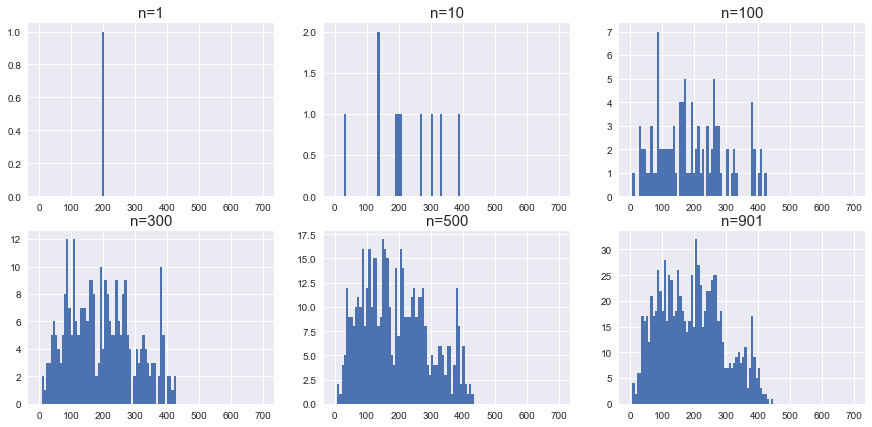

In [162]:
#Script to Validate Central Limit Theorem on Trips Dataset
daily_tickets = list(data.groupby('starttime_date').size())
sample_tickets = []
checkpoints = [1, 10, 100, 300, 500, 1000]
plot_count = 1
random.shuffle(daily_tickets)
plt.figure(figsize=(15,7))
binrange=np.array(np.linspace(0,700,101))
for i in range(1000):
    if daily_tickets:
        sample_tickets.append(daily_tickets.pop())
    if i+1 in checkpoints or not daily_tickets:
        plt.subplot(2,3,plot_count)
        plt.hist(sample_tickets, binrange)
        plt.title('n=%d' % (i+1),fontsize=15)        
        plot_count+=1
    if not daily_tickets:
       break
plt.show()

In [163]:
#STUDY FINDING

In [164]:
#The insights were rendered on data collected from 2014 to 2017 with demographic information only available for the members and not short-term pass holders.
#Trip duration follows a definite seasonal pattern that repeats over time.
#Forecasting this time series can help to predict the times when the company needs to push its marketing efforts and times when most trips anticipated can help ensure operational efficiencies.
#the best station at which to kick off the campaign would be Pier 69/Alaskan Way & Clay St.
#Outliers were a tiny portion of the dataset; however, their time series nature meant that those outliers couldn’t be removed and transformation was thus applied.
#Regarding further analysis, we were now aware that as the features are not homogeneous, the
#analysis would have to be done on the individual category level.